<a href="https://colab.research.google.com/github/Areliortiz/SIMULACION2/blob/main/Metropolis_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Metropolis-Hastings 1D**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

1.   Exponencial
2.   Weibull
3.   Cauchy

# *1. Distribución exponencial*
Aproximaremos la distribución exponencial con el método de metropolis.

Funcion de densidad: $f(x) = λe^{-λx}$

Parametro $λ>0$

In [27]:
#funcion de densidad
def exp(x_1,lamda):
  return lamda*np.exp(-lamda*x_1)

In [28]:
#parametros de la distribucion
lamda = 0.5
delta=0.1  # Entre mas grande sea delta la aceptación es menor


In [45]:
n_exponencial = 80000  # Número de iteraciones
x_1 = np.zeros(n_exponencial)  # Vector para los valores generados
x_1[0] = 2
acept_1 = 0

# Algoritmo Metropolis-Hastings
for i in range(0, n_exponencial-1):
    y_1 = x_1[i] + np.random.uniform(-delta, delta)
    if y_1 >= 0:  # Solo aceptar valores no negativos
        if np.random.rand() < min(1, exp(y_1, lamda) / exp(x_1[i], lamda)):
            x_1[i+1] = y_1
            acept_1 += 1
        else:
            x_1[i+1] = x_1[i]
    else:
        x_1[i+1] = x_1[i]
print("La aceptación fue del", acept_1/n_exponencial*100, "%")


La aceptación fue del 97.275 %


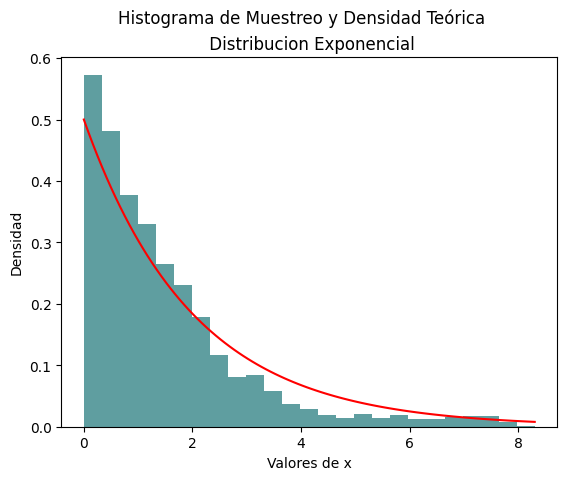

In [46]:

plt.hist(x_1,density=True,color='cadetblue',bins=25) #genera el histograma de la lista x_1
xs=np.linspace(min(x_1),max(x_1),100)   # Defiminos los límites de nuestra gráfica
plt.plot(xs,exp(xs,lamda),color='red') #genera grafica de la lista xs y la funcion exp
plt.xlabel('Valores de x')
plt.ylabel('Densidad')
plt.suptitle('Histograma de Muestreo y Densidad Teórica')
plt.title(' Distribucion Exponencial')
plt.show()

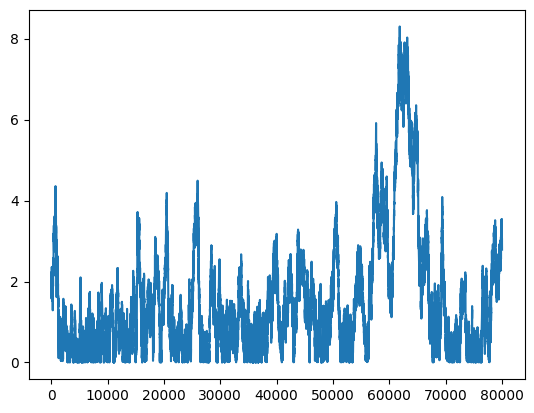

In [47]:
plt.plot(x_1)

> ***Media y Varianza***

Media(μ):	$\frac{1}{λ}$

Varianza $(σ^2)$ :	$\frac{1}{λ^2}$

Desviacion estandar(σ):$\sqrt{σ^2} \\ $

Como λ = 0.5, entonces:

Media(μ)= $\frac{1}{0.5}$=2

Varianza $(σ^2)$ :	$\frac{1}{0.5^2} = 4$

Desviacion estandar(σ):$\sqrt{4} = 2$





Media: 1.49
Varianza: 2.22
Desviación: 1.49


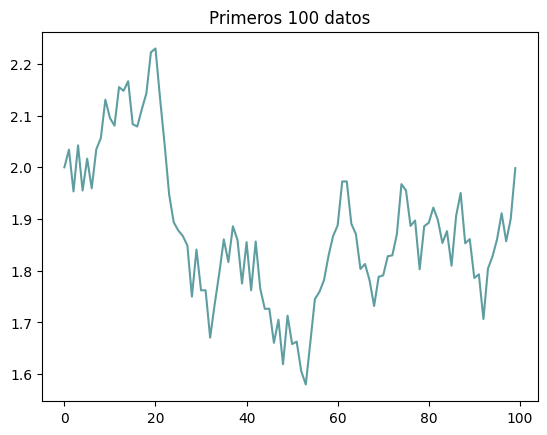

In [48]:
# Media y varianza
media = np.mean(x_1)
varianza = np.var(x_1)
desv = np.std(x_1)
print(f"Media: {media:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación: {desv:.2f}")

# Observamos el comportamiento que tienen nuestra muestra generada
plt.plot(x_1[0:100],color='cadetblue') # Primeros 100 datos
plt.title('Primeros 100 datos')
plt.show()

# *2. Distribución Weibull*
Aproximaremos la distribución de Weibull con el método de metropolis.

Funcion de densidad: $ f(x,λ,α)=λα(λx)^{α−1}$ $e^{-(λx)^α}$

Parametros:


*   $λ>0$
*   $α>0$




In [8]:
#funcion de densidad
def weibull(x,lamda,alpha):
  return lamda*alpha*(lamda*x)**(alpha-1)*np.exp(-(lamda*x)**alpha)

In [9]:
#parametros de la función
lamda_2 = 0.5
alpha_2=2
delta_2=0.2  # Entre mas grande sea delta la aceptación es menor


In [10]:
n_weibull = 80000  # Número de iteraciones
x_2 = np.zeros(n_weibull)  # Vector para los valores generados
x_2[0] = 2
acept_2 = 0

# Algoritmo Metropolis-Hastings
for i in range(0, n_weibull-1):
    y_2 = x_2[i] + np.random.uniform(-delta_2, delta_2)
    if y_2 >= 0:  # Solo aceptar valores no negativos
        if np.random.rand() < min(1, weibull(y_2, lamda,alpha_2) / weibull(x_2[i], lamda,alpha_2)):
            x_2[i+1] = y_2
            acept_2 += 1
        else:
            x_2[i+1] = x_2[i]
    else:
        x_2[i+1] = x_2[i]
print("La aceptación fue del", acept_1/n_exponencial*100, "%")

La aceptación fue del 97.795 %


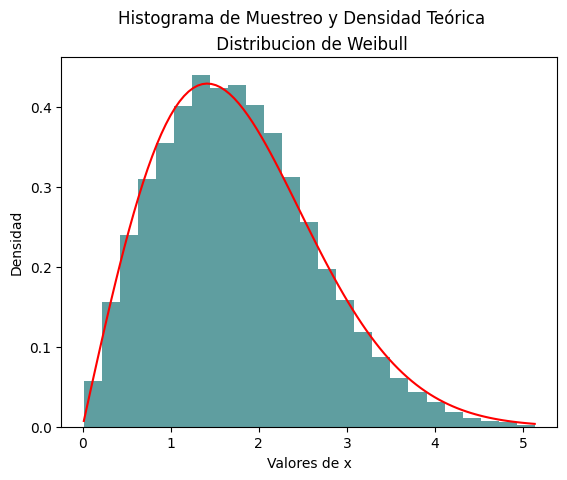

In [26]:
plt.hist(x_2,density=True,color='cadetblue',bins=25) #genera histograma de la lista x_2
xs_2=np.linspace(min(x_2),max(x_2),100)   # Defiminos los límites de nuestra gráfica
plt.plot(xs_2,weibull(xs_2,lamda_2,alpha_2),color='red') #genera grafico tomando encuenta los valores de la lista xs_2 y la funcion de Weibull
plt.xlabel('Valores de x')
plt.ylabel('Densidad')
plt.suptitle('Histograma de Muestreo y Densidad Teórica')
plt.title(' Distribucion de Weibull')


plt.show()

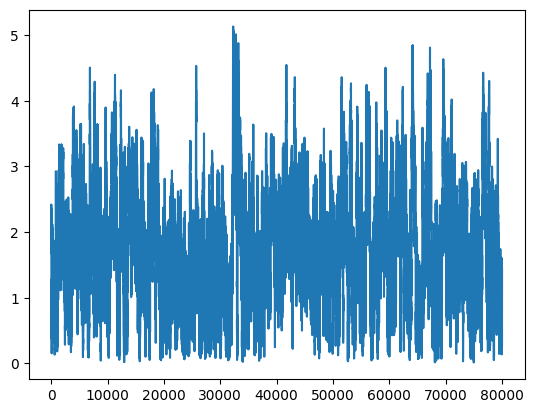

In [12]:
plt.plot(x_2)

> ***Media y Varianza***

La media $(μ)$ y la varianza $(σ^2)$ de la distribución Weibull están dadas por las siguientes fórmulas:

Media(μ)	$ = λ \cdot Γ(1 + \frac{1}{α})$

Varianza $(σ^2)$ = $\frac{1}{ λ^2} [Γ (1 + \frac{2}{α}) - Γ^2(1 + \frac{1}{α})]$

Desviacion estandar(σ):$\sqrt{σ^2} \\ $

Como λ = 0.5 y α =2, entonces:


In [13]:
# Cálculo de los valores teóricos para comparar
media_teorica = (1 / lamda_2) * sp.gamma(1 + 1 / alpha_2)
varianza_teorica = (1 / lamda_2**2) * (sp.gamma(1 + 2 / alpha_2) - (sp.gamma(1 + 1 / alpha_2))**2)
desv_teorica = varianza_teorica**0.5

In [14]:
print(f"Media teórica: {media_teorica:.2f}")
print(f"Varianza teórica: {varianza_teorica:.2f}")
print(f"Desviación teórica: {desv_teorica:.2f}")


Media teórica: 1.77
Varianza teórica: 0.86
Desviación teórica: 0.93


Media: 1.75
Varianza: 0.77
Desviación: 0.88


Text(0.5, 1.0, 'Primeros 100 datos')

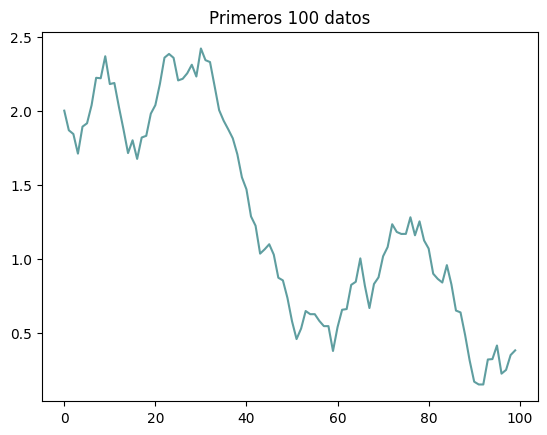

In [15]:
# Media y varianza
media_2 = np.mean(x_2)
varianza_2 = np.var(x_2)
desv_2 = np.std(x_2)
print(f"Media: {media_2:.2f}")
print(f"Varianza: {varianza_2:.2f}")
print(f"Desviación: {desv_2:.2f}")

# Observamos el comportamiento que tienen nuestra muestra generada
plt.plot(x_2[0:100],color='cadetblue') # Primeros 100 datos
plt.title('Primeros 100 datos')

# *3. Distribución de Cauchy*
Aproximaremos la distribución de Cauchy con el método de metropolis.

Funcion de densidad: $f(x;x0,γ)$ = $\frac{1}{\pi \gamma \left[ 1 + \left( \frac{x - x_0}{\gamma} \right)^2 \right]}$

Parametros:

*   $x0   ∈ ℜ $
*   $γ > 0$







In [16]:
#distribucion de Cauchy
def fgamma(x,gamma,x0):
  return 1/(np.pi*gamma*(1+((x-x0)/gamma)**2))

In [17]:
# Parametros de la distribucion
x_3i = 0
gamma_3 = 0.5
delta_3 = 0.5

In [18]:
n_3 = 5000  # n tiene que ser muy grande
x_3 = np.zeros(n_3)
x_3[0] = 0  # Valor inicial
acept_3 = 0

for i in range(0,n_3-1):
  y_3 = x_3[i] + np.random.uniform(-delta_3,delta_3)
  if np.random.rand() < min(1,fgamma(y_3,gamma_3,x_3i) / fgamma(x_3[i],gamma_3,x_3i)):
      x_3[i+1]=y_3
      acept_3 += 1
  else:
      x_3[i+1] = x_3[i]
print("La aceptacion fue del", acept_3/n_3*100,"%")





La aceptacion fue del 85.0 %


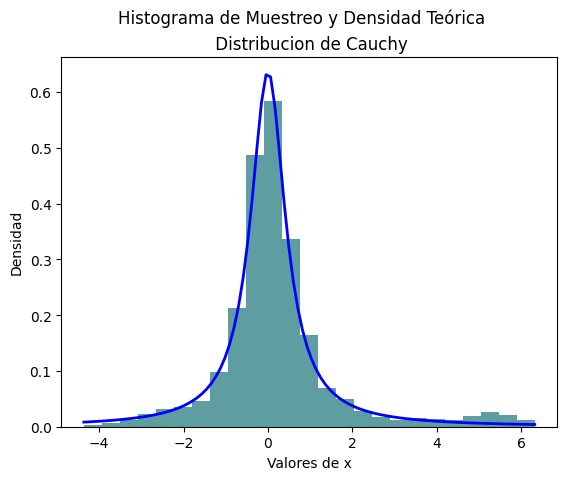

In [35]:
# Graficamos el histograma y función de densidad
plt.hist(x_3, density=True,bins=25, color='cadetblue')  # Histograma de los valores generados
xs_3 = np.linspace(min(x_3), max(x_3), 100)  # Rango para graficar la densidad teórica
plt.plot(xs_3, fgamma(xs_3, gamma_3,x_3i ), color="blue", linewidth=2)  # Gráfico de la función de densidad
plt.xlabel('Valores de x')
plt.ylabel('Densidad')
plt.suptitle('Histograma de Muestreo y Densidad Teórica')
plt.title(' Distribucion de Cauchy')
plt.show()

> ***Media y Varianza***

La media $(μ)$ y la varianza $(σ^2)$ de la distribución de Cauchy es una distribución de probabilidad continua que se caracteriza por no tener una media, no se pueden definir en términos convencionales debido a la dispersión de sus valores extremos

media:  $𝔼[X]= \int_{-\infty}^{\infty} \frac{x}{\pi (1 + x^2)} \, dx$, no esta definidala integral

varianza: $𝕍[X] \int_{-\infty}^{\infty} \frac{x^2}{\pi (1 + x^2)} \, dx$, tampoco esta definida




Media: 0.23
Varianza: 2.09
Desviación: 1.45


Text(0.5, 1.0, 'Primeros 100 datos')

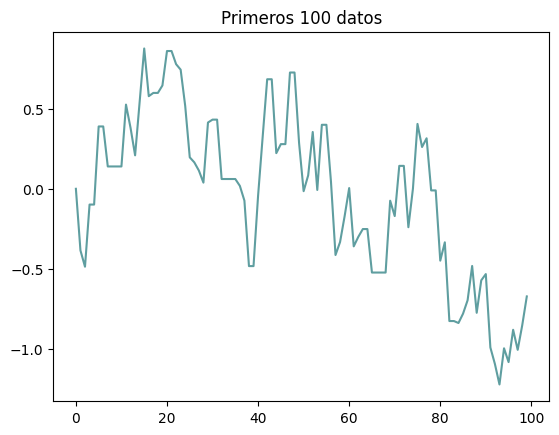

In [40]:
# Media y varianza
media_3 = np.mean(x_3)
varianza_3 = np.var(x_3)
desv_3 = np.std(x_3)
print(f"Media: {media_3:.2f}")
print(f"Varianza: {varianza_3:.2f}")
print(f"Desviación: {desv_3:.2f}")

# Observamos el comportamiento que tienen nuestra muestra generada
plt.plot(x_3[0:100],color='cadetblue') # Primeros 100 datos
plt.title('Primeros 100 datos')